In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(1234)

$$
% brackets, norms, cardinalities
\newcommand{\pa}[1]{ \left({#1}\right) }
\newcommand{\ha}[1]{ \left[{#1}\right] }
\newcommand{\ca}[1]{ \left\{{#1}\right\} }
\newcommand{\inner}[1]{\left\langle #1 \right\rangle}
\newcommand{\innercpy}[1]{\inner{ #1, #1 }}
\newcommand{\norm}[1]{\left\| #1 \right\|}
\newcommand{\abs}[1]{\left|{#1}\right|}
\newcommand{\card}[1]{\left\vert{#1}\right\vert}
% math vectors
\newcommand{\va}{\textbf{a}}
\newcommand{\vb}{\textbf{b}}
\newcommand{\vc}{\textbf{c}}
\newcommand{\vd}{\textbf{d}}
\newcommand{\ve}{\textbf{e}}
\newcommand{\vf}{\textbf{f}}
\newcommand{\vg}{\textbf{g}}
\newcommand{\vh}{\textbf{h}}
\newcommand{\vi}{\textbf{i}}
\newcommand{\vj}{\textbf{j}}
\newcommand{\vk}{\textbf{k}}
\newcommand{\vl}{\textbf{l}}
\newcommand{\vm}{\textbf{m}}
\newcommand{\vn}{\textbf{n}}
\newcommand{\vo}{\textbf{o}}
\newcommand{\vp}{\textbf{p}}
\newcommand{\vq}{\textbf{q}}
\newcommand{\vr}{\textbf{r}}
\newcommand{\vs}{\textbf{s}}
\newcommand{\vt}{\textbf{t}}
\newcommand{\vu}{\textbf{u}}
\newcommand{\vv}{\textbf{v}}
\newcommand{\vw}{\textbf{w}}
\newcommand{\vx}{\textbf{x}}
\newcommand{\vy}{\textbf{y}}
\newcommand{\vz}{\textbf{z}}
\newcommand{\vzero}{\textbf{0}}
\newcommand{\vone}{\textbf{1}} 
\newcommand{\valpha}{{\boldsymbol\alpha}}
\newcommand{\vepsilon}{{\boldsymbol\epsilon}}
\newcommand{\veta}{{\boldsymbol\eta}}
\newcommand{\vsigma}{ {\boldsymbol\sigma}}
\newcommand{\vtheta}{ {\boldsymbol\theta}}
\newcommand{\vdelta}{ {\boldsymbol\delta}}
\newcommand{\vlambda}{ {\boldsymbol\lambda}}
\newcommand{\vmu}{ {\boldsymbol\mu}}
% common math sets
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\F}{\mathbb{F}}
\newcommand{\T}{\mathbb{T}}
% limits
\def\sumn{\sum_{n=0}^\infty}
\def\limn{\lim_{n\rightarrow\infty}}
\def\prodn{\prod_{n=0}^\infty}
% mathcal
\newcommand{\mcA}{\mathcal{A}}
\newcommand{\mcB}{\mathcal{B}}
\newcommand{\mcC}{\mathcal{C}}
\newcommand{\mcD}{\mathcal{D}}
\newcommand{\mcE}{\mathcal{E}}
\newcommand{\mcF}{\mathcal{F}}
\newcommand{\mcG}{\mathcal{G}}
\newcommand{\mcH}{\mathcal{H}}
\newcommand{\mcI}{\mathcal{I}}
\newcommand{\mcJ}{\mathcal{J}}
\newcommand{\mcK}{\mathcal{K}}
\newcommand{\mcL}{\mathcal{L}}
\newcommand{\mcM}{\mathcal{M}}
\newcommand{\mcN}{\mathcal{N}}
\newcommand{\mcO}{\mathcal{O}}
\newcommand{\mcP}{\mathcal{P}}
\newcommand{\mcQ}{\mathcal{Q}}
\newcommand{\mcR}{\mathcal{R}}
\newcommand{\mcS}{\mathcal{S}}
\newcommand{\mcT}{\mathcal{T}}
\newcommand{\mcU}{\mathcal{U}}
\newcommand{\mcV}{\mathcal{V}}
\newcommand{\mcW}{\mathcal{W}}
\newcommand{\mcX}{\mathcal{X}}
\newcommand{\mcY}{\mathcal{Y}}
\newcommand{\mcZ}{\mathcal{Z}}
% distribs, probability
\newcommand{\disteq}{\overset{d}{=}}
\newcommand\independent{\perp \!\!\! \perp}
\DeclareMathOperator{\Laplace}{Laplace}
\DeclareMathOperator{\Poisson}{Poisson}
\DeclareMathOperator{\Exponential}{Exponential}
\DeclareMathOperator{\Multinomial}{Multinomial}
\DeclareMathOperator{\Bernoulli}{Bernoulli}
\DeclareMathOperator{\Categorical}{Categorical}
\DeclareMathOperator{\Uniform}{Uniform}
\DeclareMathOperator{\Binomial}{Binomial}
\DeclareMathOperator{\Hypergeometric}{Hypergeometric}
\DeclareMathOperator{\GammaDist}{Gamma}
\DeclareMathOperator{\NegativeBinomial}{NegativeBinomial}
\DeclareMathOperator\sub{sub}
\renewcommand{\d}[1]{\mathop{\mathrm{d} #1 }}
\newcommand{\dkl}[2]{\mathop{D_\mathrm{KL}}\left({#1}\;\middle\|\;{#2}\right)}
\newcommand{\sg}{\mathop{\mathrm{SG}}}
\newcommand{\se}{\mathop{\mathrm{SE}}}
%operators
\DeclareMathOperator{\power}{{\mathcal{P}}}
\DeclareMathOperator{\var}{var}
\DeclareMathOperator{\cov}{cov}
\DeclareMathOperator\mathProb{\mathbb{P}}
\DeclareMathOperator\mathExp{\mathbb{E}}
\DeclareMathOperator*\mathExpUnder{\mathbb{E}}
\DeclareMathOperator*\fat{fat}
\renewcommand{\P}{\mathProb} % need to overwrite stupid paragraph symbol
\newcommand{\E}{\mathExp} % need to overwrite stupid paragraph symbol
\newcommand{\set}[2]{ \left\{ #1 \,\middle|\, #2 \right\} }
\newcommand{\CE}[2]{ \mathExp\left[ #1 \,\middle|\, #2 \right] }
$$

# Problem 4.15

_(A) Consider an SCM $X\gets N_X, Y\gets 2X+N_Y$ with $N_X\sim\Uniform[1,3]\independent N_Y\sim\Uniform[-0.5, 0.5]$. Draw this ANM from $X$ to $Y$. Why is there no ANM in the reverse direction?_

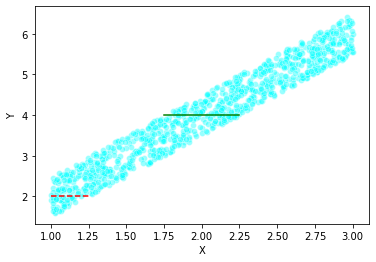

In [2]:
n = 1000
x = np.random.uniform(1, 3, n)
y = 2 * x + np.random.uniform(-0.5, 0.5, n)
sns.scatterplot(x, y, color='cyan', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot([1, 1.25], [2, 2], ls='--', c='red')
plt.plot([1.75, 2.25], [4, 4], ls='-', c='green')
plt.show()

Proof is clear from the diagram. The joint distribution has $X$ get support on an interval of length $\frac{1}{2}\pa{1-\max(0, Y-5.5, 2.5-Y)}$. An ANM of the form $X\gets g(Y)+M_X$, by independence of $Y,M_X$ implies $X$ has support of length exactly equal to that of $M_X$, which for the two highlighted values is not the same.

_(B) What about the SCM $X\gets N_X, Y\gets X^2+N_Y$?_

Same reasoning.

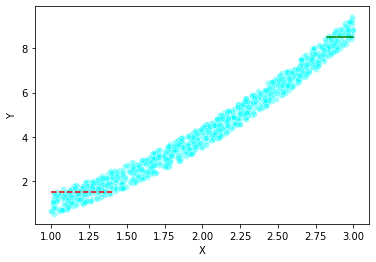

In [3]:
n = 1000
x = np.random.uniform(1, 3, n)
y = x ** 2 + np.random.uniform(-0.5, 0.5, n)
sns.scatterplot(x, y, color='cyan', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot([1, np.sqrt(2)], [1.5, 1.5], ls='--', c='red')
plt.plot([np.sqrt(8), 3], [8.5, 8.5], ls='-', c='green')
plt.show()

# Problem 4.16

_Assume we're given iid observations $(X_i, Y_i)$ for $i\in[n]$ from $Y\gets f(X)+N_Y$ with $X\sim N(\mu_X,\sigma^2_X), N_Y\sim N(\mu_{N_Y},\sigma^2_{N_Y})$ and $f$ known._

_(A) Show that the conditional mean recovers $f$._

This holds immediately by linearity, independence.
$$
\CE{Y}{X}=\CE{f(X)}{X}+\E\ha{N_Y}=f(X)+\mu_{N_Y}
$$

Note the problem has a typo here, it's been pointed out in the Errata.

_(B) Show that MLE is negative linear in $\log\hat\var( \vx)+\log\hat\var(\vy-f(\vx))$ with $\vx,\vy$ our iid observations, $\hat\var$ the population variance MLE, and $f$ vectorizes. This means that residual/covariate variance sum can distinguish between cause and effect using MLE consistency (which, I'd guess, would need to be over the space of both $X\rightarrow Y$ and $X\leftarrow Y$ models). See Equation (4.18) in the textbook and the problem for discussion._

Let $\theta=(\mu_X, \mu_{N_Y},\sigma^2_X,\sigma^2_{N_Y})$. Then our log-likelihood is given by
$$
\ell_\theta(\vx,\vy)=\sum_i\log p_\theta(x_i,y_i)
$$
Since $p(x,y)=p(x)p(y|x)$ factorizes into the product of two normals, and $Y-f(X)=N_Y$, we have that $p(x)$ is a normal likelihood with unknown mean and variance, as is $p(y|x)=p(N_Y=(y-f(X)))$.

Thus the optimal MLE log-likelihood is the sum of two independent normals' MLE log-likelihoods, each with their own optimal parameters (factorization makes the maximization independent). See a calculation [on Wikipedia](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Continuous_distribution,_continuous_parameter_space).